In [1]:
import pandas as pd
import numpy as np
import copy
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from my_explainers import my_global_explainer, my_local_explainer, get_clusters
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [2]:
#import dataset
data = pd.read_csv("../datasets/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
X, y = data.loc[:, data.columns != 'Outcome'], data['Outcome']

#save original data for later
original_data = copy.copy(X)

#split in train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

#train random forest
rforest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)

#evaluate model
y_pred = rforest.predict(X_test)
print("Prcecision Score: {:.2f}".format(precision_score(y_test,y_pred))) 
print("Recall Score: {:.2f}".format(recall_score(y_test,y_pred))) 
print("F1 Score: {:.2f}".format(f1_score(y_test,y_pred))) 

Prcecision Score: 0.98
Recall Score: 0.92
F1 Score: 0.95


In [4]:
#create explainer and compute shap values
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X, check_additivity=False)
shap_values[1]

# load JS visualization code to notebook
shap.initjs()

In [5]:
prediction = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][prediction,:], original_data.iloc[prediction])

In [6]:
my_local_explainer(explainer.expected_value[0], shap_values[0], rforest, original_data, X, 0)

interactive(children=(BoundedIntText(value=0, description='Sample id:', layout=Layout(padding='10px 640px 0px …

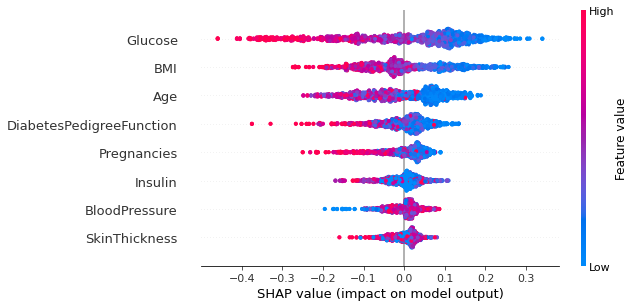

In [7]:
shap.summary_plot(shap_values[0], X)

In [8]:
shap.force_plot(explainer.expected_value[0], shap_values[0], original_data)

In [9]:
my_global_explainer(explainer.expected_value[0], shap_values[0], rforest, original_data, X, 0)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Threshold for cluster forma…

In [10]:
cluster_data = get_clusters(explainer.expected_value[1], shap_values[1], rforest, original_data, X, 1, 0.25)
cluster_data[0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
218,5.0,85.0,74.0,22.0,0.0,29.0,1.224,32.0
1376,5.0,85.0,74.0,22.0,0.0,29.0,1.224,32.0
1747,3.0,80.0,82.0,31.0,70.0,34.2,1.292,27.0
659,3.0,80.0,82.0,31.0,70.0,34.2,1.292,27.0
1116,3.0,80.0,82.0,31.0,70.0,34.2,1.292,27.0
...,...,...,...,...,...,...,...,...
630,7.0,114.0,64.0,0.0,0.0,27.4,0.732,34.0
1087,7.0,114.0,64.0,0.0,0.0,27.4,0.732,34.0
1794,10.0,115.0,0.0,0.0,0.0,0.0,0.261,30.0
706,10.0,115.0,0.0,0.0,0.0,0.0,0.261,30.0
